In [1]:
import pylab as plt
import numpy as np
%matplotlib inline
import matplotlib
params = {
        'axes.labelsize' : 16,
        'font.size' : 14,
        'legend.fontsize': 14,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'text.usetex': False,
        'figure.figsize': [10, 8]
        }
matplotlib.rcParams.update(params)

from casp import casp, utils
from scipy import interpolate
from scipy.integrate import quad
import csv

# Section 2 

In [2]:
r_dat, mag_uniq, cvs = utils.read_r_mags()

In [3]:
def n_gal(m_r):
    return 10**spl(m_r)

In [4]:
spl = interpolate.UnivariateSpline(x = mag_uniq,
    y = np.log10(r_dat),
    bbox=[-100, 100],
    k=3)

In [5]:
x = np.linspace(mag_uniq.min(), mag_uniq.max(), 100)

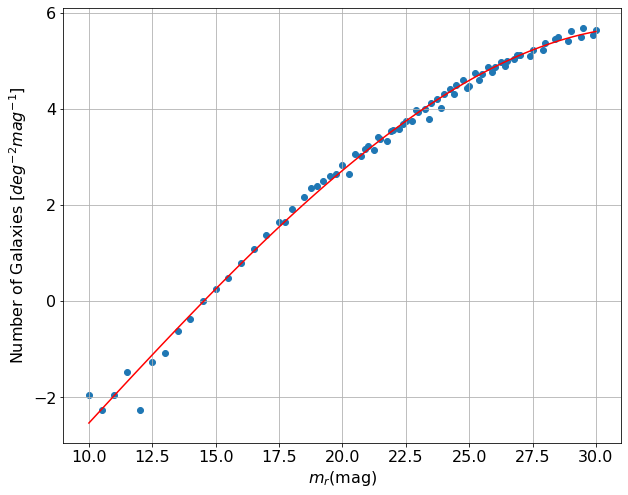

In [6]:
# Fig 1, top left
plt.scatter(mag_uniq, np.log10(r_dat))
plt.plot(x, (spl(x)), c='r')
plt.ylabel(r'Number of Galaxies $[deg^{-2}mag^{-1}]$')
plt.xlabel(r'$m_r$(mag)')
plt.grid()

In [7]:
ms = np.linspace(0,30,100)
ns = []

Text(0.5, 0, '$R_{FRB}$ (arcsec)')

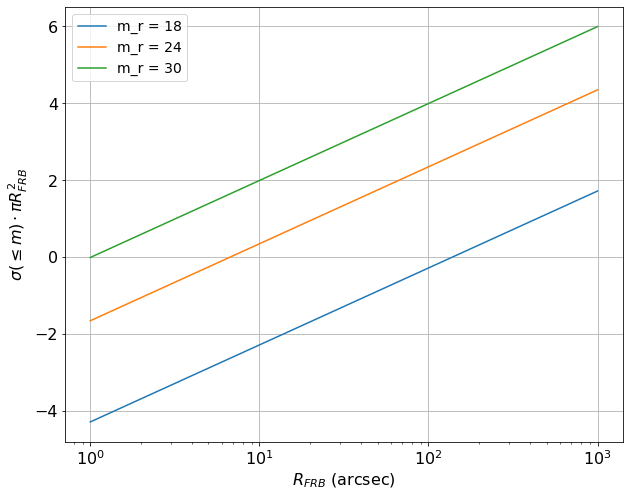

In [8]:
# Fig 1, top right
ms = [18, 24, 30]
for m in ms:
    rs = np.linspace(1,1000, 100)
    ps = []
    ns = []
    for r in rs:
        p, n = casp.prob_eb17(r, m, ret_numgal = True)
        ps.append(p)
        ns.append(n)
    p = np.array(p)
    ns = np.array(ns)
    plt.plot(rs, np.log10(ns), label=f'm_r = {m}')
plt.legend()
plt.xscale('log')
plt.grid()
plt.ylabel(r'$\sigma(\leq m)\cdot \pi R^2_{FRB}$')
plt.xlabel(r'$R_{FRB}$ (arcsec)')

# Section 3 (using redshift)

In [9]:
M = np.linspace(-15, -24.5, 100)

In [10]:
zs = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.1]
alphas = [-1.05, -1.175, -1.3, -1.3, -1.3, -1.3, -1.3]
phi_stars = [14.9*0.7**3, 4.32, 3.53, 3.23, 3.46, 3.78, 2.5] # 10^-3 h^3 Mpc^-3 mag^-1  (h = 1)
Mb_stars = [-20.44, -20.54, -20.64, -20.97, -21.08, -21.22, -21.39]  # + 5 logh70

In [11]:
phis = []
for i, z in enumerate(zs):
    phis.append(utils.schechter_fn(M, phi_stars[i], Mb_stars[i], alphas[i]))

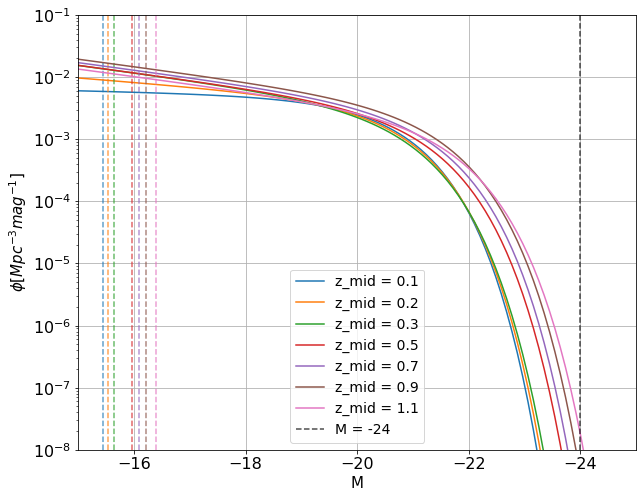

In [12]:
# Figure 2, top left
plt.figure()
for i in range(len(zs)):
    l = plt.plot(M, phis[i]*10**(-3), label=f'z_mid = {zs[i]}')
    plt.axvline(x=Mb_stars[i] + 5, color = l[0].get_c(), alpha = 0.7, linestyle = '--')
plt.axvline(x=-24, color = 'k', alpha = 0.7, linestyle = '--', label='M = -24')
plt.yscale('log')
plt.xlabel('M', fontsize=15)
plt.ylabel(r'$\phi [Mpc^{-3} mag^{-1}]$', fontsize=15)
plt.legend()
plt.xlim([-15, -25])
plt.ylim([10**(-8), 10**(-1)])
plt.grid()

In [13]:
# with open('../data/num_galaxies.txt', newline='') as file:
#     reader = csv.reader(file, quoting=csv.QUOTE_NONNUMERIC)
#     z_mins = []
#     z_maxs = []
#     num_total = []
#     for row in reader:
#         z_mins.append(row[0])
#         z_maxs.append(row[1])
#         num_total.append(row[2])

In [14]:
utils.calc_num_of_galaxies()

(array([0. , 0.1, 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.1, 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [7391864.650475038,
  57712458.93144452,
  479378524.07428855,
  1101775738.812701,
  1929280224.618195,
  2941857435.1465583,
  2490046446.3012757])

In [15]:
z_mins, z_maxs, num_total = utils.calc_num_of_galaxies()

In [16]:
z_s = [0.3, 0.5, 0.9, 1.1]

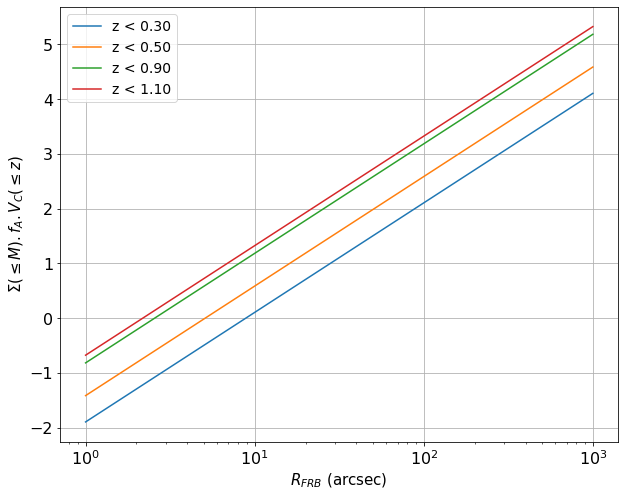

In [17]:
# Figure 2, top right
plt.figure()
for i, z in enumerate(z_s):
    if z < 1.2:
        rs = []
        ns = []
        ps = []
        for R_frb in np.linspace(1,1000,100):
            p, n = casp.prob_eb17_z(z, R_frb, ret_numgal = True, num_galaxies_file='../casp/data/num_galaxies.txt')
            ns.append(n)
            rs.append(R_frb)
            ps.append(p)
        plt.plot(rs, np.log10(ns), label=f'z < {z:.2f}')
plt.xlabel(r'$R_{FRB}$ (arcsec)', fontsize=15)
plt.ylabel(r'$\Sigma(\leq M).f_A.V_C(\leq z)$', fontsize=15)
plt.xscale('log')
plt.legend()
plt.grid()